<a href="https://colab.research.google.com/github/disha4u/Adult_Dataset_Visualization-Anaysis/blob/main/Analyzing_Adult_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing the Dataset

This is a part CSE 572: Homework 1.



### Part 1: EDA

I use the [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult) for this assignment.

The first step in a Data Mining/Amalysing project is to understand ins and outs of your chosen dataset.


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

data = data.drop(['fnlwgt', 'education-num'], axis=1)  #this column is not demographic information
data = data.replace(' ?', np.nan)

data.sample(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
20235,22,Private,Some-college,Never-married,Sales,Own-child,White,Male,0,0,8,United-States,<=50K
7839,33,NaN,7th-8th,Separated,NaN,Not-in-family,White,Male,0,0,40,Guatemala,<=50K
31541,26,Private,Assoc-voc,Never-married,Exec-managerial,Not-in-family,Black,Female,0,0,40,United-States,<=50K
24237,19,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K
18843,35,State-gov,Assoc-acdm,Widowed,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
177,34,Private,HS-grad,Never-married,Handlers-cleaners,Not-in-family,Black,Male,0,0,40,United-States,<=50K
12086,66,Private,HS-grad,Widowed,Sales,Not-in-family,White,Female,0,0,40,United-States,>50K
9915,29,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,60,United-States,<=50K
31655,48,Self-emp-inc,Bachelors,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,70,United-States,>50K
12118,56,Private,1st-4th,Separated,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K


In [2]:
#to understand length of the data and number of attributes
data.shape
# answer should be 32561 rows and 13 attributes

(32561, 13)

In [3]:
#understand type of each attribute
data.dtypes

,0
age,int64
workclass,object
education,object
marital-status,object
occupation,object
relationship,object
race,object
sex,object
capital-gain,int64
capital-loss,int64


In [4]:
# to understand categories in the data
for col in data.columns:

  if type(data[col][0]) == str:
    print(data[col].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital-status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         

In [5]:
#to find missing values for each attribute
data.isna().sum()

,0
age,0
workclass,1836
education,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0
capital-gain,0
capital-loss,0


In [6]:
#count the number of rows with 1 or more attribute having a missing value
data.isna().any(axis=1).sum()

2399

In [7]:
#count the number of duplicate rows
data.duplicated().sum()

3465

In [8]:
#dropping attributes not required as per customer in this case professor
df=data.drop(['workclass','education','relationship','capital-gain',
              'capital-loss','hours-per-week','native-country'],axis=1)

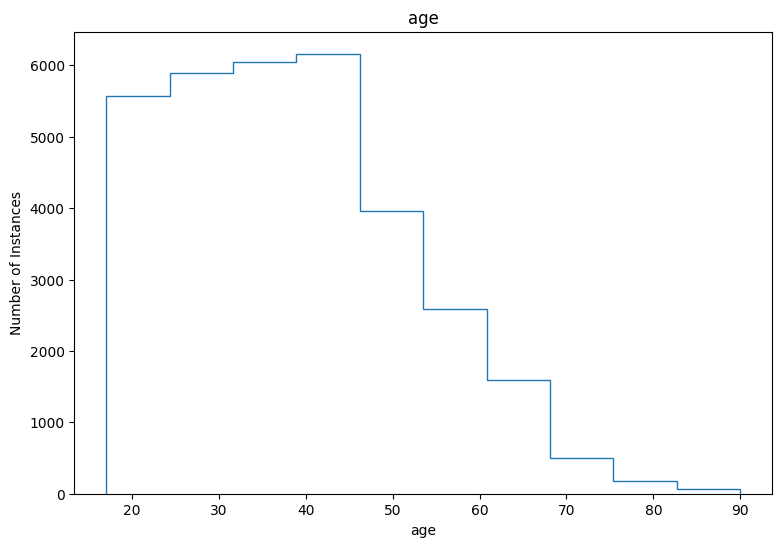

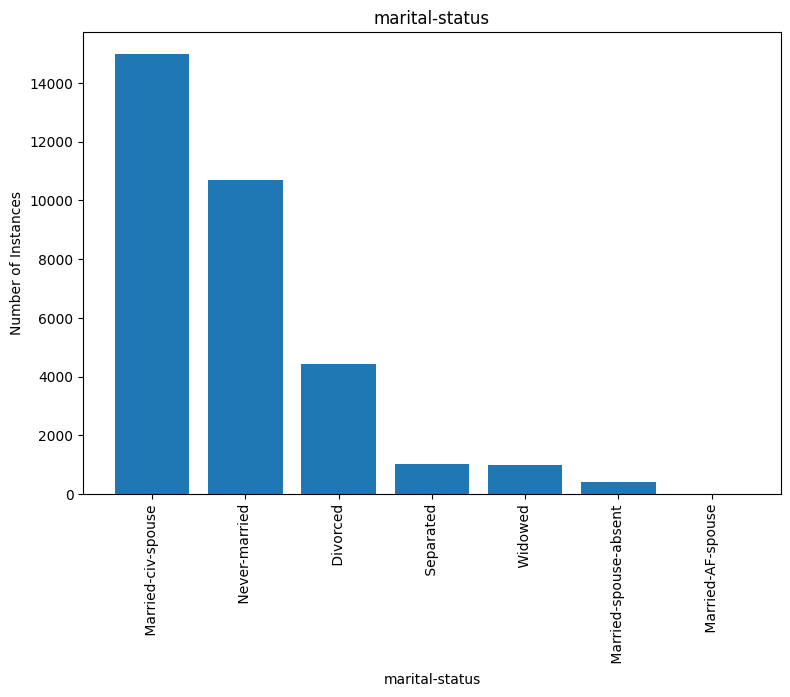

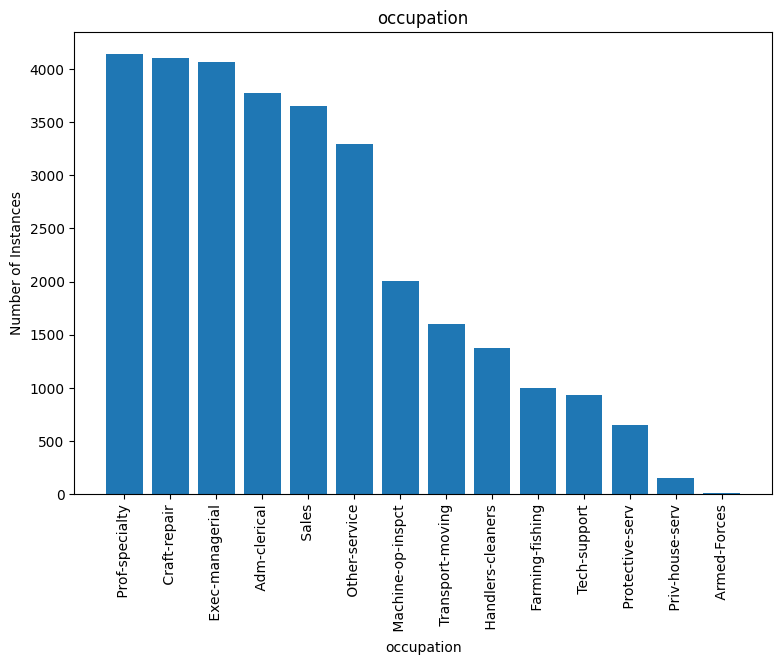

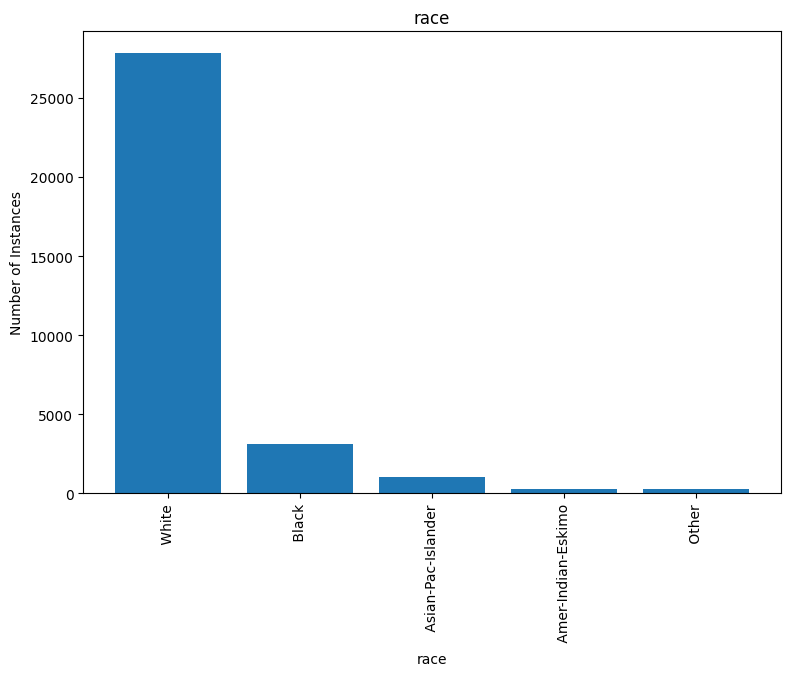

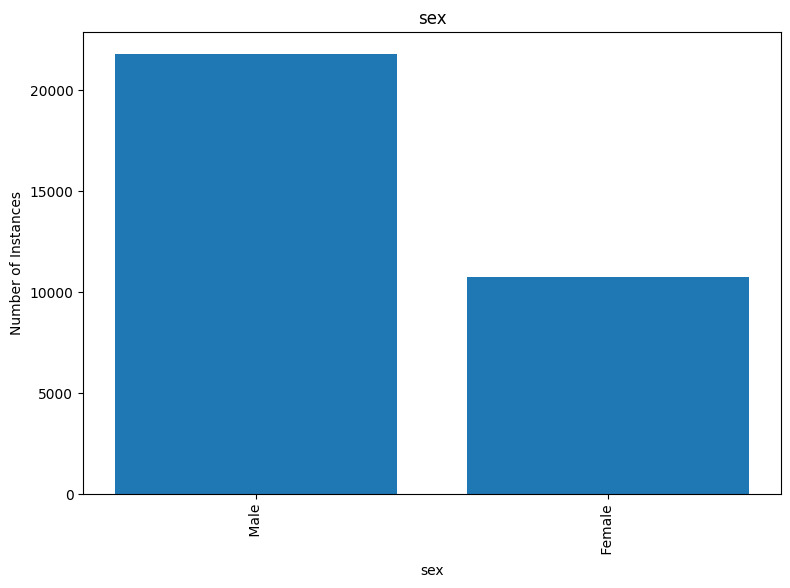

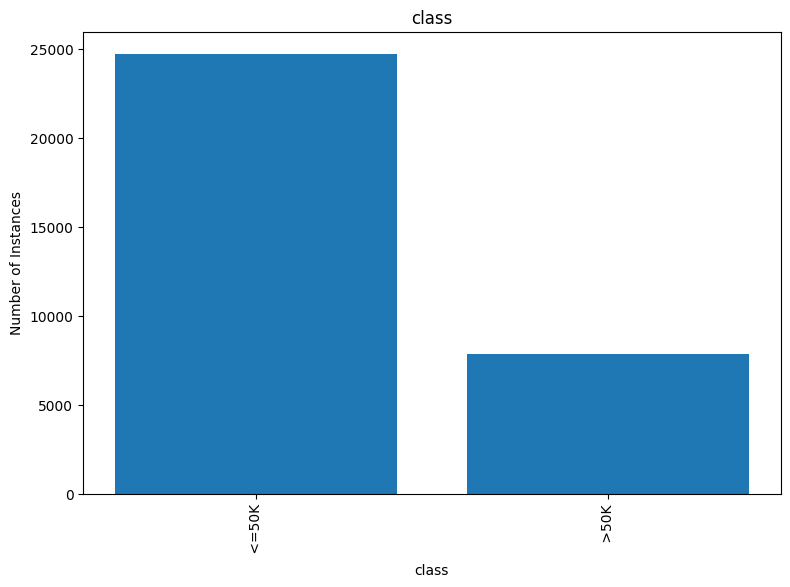

In [9]:
#distribution of the attributes and label class
import matplotlib.pyplot as plt
import seaborn as sns

#dfm=data.melt(var_name='columns')
#g = sns.displot(data=dfm, x='value', col='columns', col_wrap=3, common_norm=False, kde=True, stat='density')


#for numeric data we plot histogram and for categorical variables we plot value counts as bar plots
dt=data.dtypes
plt.rcParams["figure.figsize"] = (9, 6)
for d,col in zip(dt,df.columns):
  if ( d=='int64'):
    plt.hist(data[col],histtype='step')
  else:
    t=data[col].value_counts()
    plt.bar(height=t.to_list(),x=t.index.to_list())
    plt.xticks(t.index.to_list(), rotation='vertical')

  plt.xlabel(col)
  plt.ylabel("Number of Instances")
  plt.title(col)
  #plt.figure().set_figwidth(12)
  plt.show()

In [10]:
#convert categorical variables to numeric data using factorize
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.factorize(df[col])[0]

In [11]:
#correlation between attributes
cr=df.corr()

In [12]:
cr

,age,marital-status,occupation,race,sex,class
age,1.000000,0.424606,-0.018125,-0.040000,-0.088832,0.234037
marital-status,0.424606,1.000000,-0.020285,0.012722,0.181870,0.002644
occupation,-0.018125,-0.020285,1.000000,-0.002191,-0.212824,-0.043273
race,-0.040000,0.012722,-0.002191,1.000000,0.067840,-0.067713
sex,-0.088832,0.181870,-0.212824,0.067840,1.000000,-0.215980
class,0.234037,0.002644,-0.043273,-0.067713,-0.215980,1.000000


In [13]:
cr['class'] #correlation of variables with the class

,class
age,0.234037
marital-status,0.002644
occupation,-0.043273
race,-0.067713
sex,-0.215980
class,1.000000


### Part 2: Construct your classifier

In Part 2, a classifier to predict whether an individual has high or low income based on the US Census dataset will be created.

##### Model Training

To find the best ML model we train different models and use grid search to find hyperparameters for them.

Data Preprocessing:

Dropping missing values and duplicates and sensitive attributes

In [14]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                'marital-status', 'occupation', 'relationship', 'race', 'sex',
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

data = data.drop(['fnlwgt', 'education-num'], axis=1)

data = data.replace(' ?', np.nan)

#drop rows with missing values and duplicates and not required attributes
print(len(data))
df=data.dropna()
print(len(df))
df=df.drop_duplicates()
print(len(df))
df=df.drop(['workclass','education','relationship','capital-gain',
              'capital-loss','hours-per-week','native-country'],axis=1)

print(len(df))

32561
30162
26904
26904


In [15]:
#Preprocessing , converting categorical columns to numeric for model fitting
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=pd.factorize(df[col])[0]

In [16]:
#standardization or z-score normalization
df = (df - df.mean()) / df.std()

In [17]:
#after standardization class will be float, to convert class to categorical variable for model training
df['class']=df['class'].astype(int)

In [18]:
#set seed value for reproducible results
seed = 42
np.random.seed(seed)

In [19]:
#split dataframe into train 60% ,val 20% and test 20% of the dataset
train, val, test = np.split(df.sample(frac=1, random_state=42), [int(.6*len(df)), int(.8*len(df))])

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [20]:
len(train)

16142

In [21]:
len(val)

5381

In [22]:
len(test)

5381

In [23]:
from sklearn.model_selection import GridSearchCV

def bestparams(model,param_grid,train):
  """
  Perform a grid search to find the best hyperparameters for a given model.

    Args:
        model: The machine learning model to be optimized (e.g., SVM, RandomForest, etc.).
        param_grid: A dictionary specifying the hyperparameter options to evaluate.
                    Keys are hyperparameter names, and values are lists of possible values.
        train: The training dataset as a DataFrame, where the column 'class' is the target variable.

    Returns:
        The best combination of hyperparameters found during the grid search.
  """
  #create grid search object
  clf = GridSearchCV(model, param_grid)
  #fit all params
  #class is the target hence dropped from train
  clf.fit(train.drop(columns=['class']),train['class'])
  #return best params
  return clf.best_params_


KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

"""
Create a KNN model and find the best hyperparameters from using grid search
n_neighbors: number of neighbors to use
weights: how points in the neighbourhood are weighed
metric: the distance metric to use for the classifier
"""
knn=KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(3, 8)),
              'weights': ['uniform', 'distance'],
              'metric': ['l1', 'l2', 'cosine']
             }
params=bestparams(knn,param_grid,train)
print(params)
knn=KNeighborsClassifier(metric=params['metric'], n_neighbors= params['n_neighbors'], weights=params['weights'])
knn.fit(train.drop(columns=['class']),train['class'])

{'metric': 'l2', 'n_neighbors': 6, 'weights': 'uniform'}


KNeighborsClassifier(metric='l2', n_neighbors=6)

Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
"""
Create a naive baiyes classifier for the data
"""
nb=GaussianNB()
nb.fit(train.drop(columns=['class']),train['class'])

GaussianNB()

SVM

In [26]:
from sklearn.svm import SVC

"""
Create a SVM model and find the best hyperparameters from using grid search
C: Regularization parameter. The strength of the regularization is inversely proportional to C.
kernel: Kernel type to be used in the algorithm.
degree: Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
"""
svm= SVC()
param_grid = {'C': list(range(2, 5)),
              'kernel': ['rbf', 'linear'],
             }
params=bestparams(svm,param_grid,train)
print(params)
svm=SVC(C=params['C'],kernel=params['kernel'])
svm.fit(train.drop(columns=['class']),train['class'])

{'C': 3, 'kernel': 'rbf'}


SVC(C=3)

Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier

"""
Create a Decision Tree model and find the best hyperparameters from using grid search
criterion: The function to measure the quality of a split.
max_depth: The maximum depth of the tree.
"""
dt=DecisionTreeClassifier()
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': list(range(3,8))
             }
params=bestparams(dt,param_grid,train)
print(params)
dt=DecisionTreeClassifier(criterion= params['criterion'],max_depth= params['max_depth'])
dt.fit(train.drop(columns=['class']),train['class'])

{'criterion': 'gini', 'max_depth': 6}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


DecisionTreeClassifier(max_depth=6)

Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

"""
Create a Random Forest model and find the best hyperparameters from using grid search
n_estimators: The number of trees in the forest.
criterion: The function to measure the quality of a split.
max_depth: The maximum depth of the tree.
"""
rf=RandomForestClassifier()
param_grid = {'n_estimators': list(range(95,101)),
              'criterion': ['gini', 'entropy'],
              'max_depth': list(range(3,8))
             }
params=bestparams(rf,param_grid,train)
print(params)
rf=RandomForestClassifier(n_estimators=params['n_estimators'],
                criterion= params['criterion'],max_depth= params['max_depth'])
rf.fit(train.drop(columns=['class']),train['class'])

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 95}


RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=95)

Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression

"""
Create a Logistic Regression model and find the best hyperparameters from using grid search
C: Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.
penalty: Used to specify the norm used in the penalization. default is l2
"""
lr=LogisticRegression()
param_grid = {'C': list(range(1,3)),
             }
params=bestparams(lr,param_grid,train)
print(params)
lr=LogisticRegression(C=params['C'],penalty= 'l2')
lr.fit(train.drop(columns=['class']),train['class'])

{'C': 1}


LogisticRegression(C=1)

### Evaluation

Your final model evaluation should be performed on the test set. Report the following metrics:
- Overall accuracy
- Precision
- Recall
- F1 score

In [30]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [31]:
def evaluate(model,metrics,testds):
  """
  Evaluate a machine learning model on a test dataset.
  Evaluate a given model on a test dataset using specified metrics.

    Args:
        model: The machine learning model to evaluate. Must implement a `predict` method.
        metrics: A list of evaluation metrics to calculate. Supported metrics include
                 'accuracy', 'precision', 'recall', and 'f1 score'.
        testds: A DataFrame containing the test dataset. It must include a 'class' column as the target variable.

    Returns:
        A dictionary containing the model name and the computed values for the specified metrics.
  """
  # Predict the target values ('class') for the test dataset features
  # Drop the 'class' column to use only feature columns for prediction
  pred=model.predict(testds.drop(columns=['class']))
  # Inite a dictionary to store evaluation results.
  results={}
  # Add the model's name
  results['model_name']=type(model).__name__
  #to track is=f precision and recall are calculated
  f=0
  #calculate accuracy if in metrics
  if 'accuracy' in metrics:
    results['accuracy']=accuracy_score(testds['class'],pred)
  #calculate precision if in metrics
  if 'precision' in metrics:
    f=1
    results['precision']=precision_score(testds['class'],pred)
  #calculate recall if in metrics
  if 'recall' in metrics:
    if f==0:
      f=1
    else:
      f=2
    results['recall']=recall_score(testds['class'],pred)
  #calculate f1 score if in metrics
  if 'f1 score' in metrics:
    if f!=2:
      #if precision and recall not there use the predictions and class
      results['f1_score']=f1_score(testds['class'],pred)
    #otherwise use precision and recall from earlier computation for f1 computation
    results['f1_score']=2*results['precision']*results['recall']/(results['recall']+results['precision'])
  return results



In [32]:
l=[]
models=[knn,nb,svm,dt,rf,lr]
metrics=['accuracy','precision','recall','f1 score']
for m in models:
  l.append(evaluate(m,metrics,test))


In [33]:
l

[{'model_name': 'KNeighborsClassifier',
  'accuracy': 0.7896301802638914,
  'precision': 0.6403995560488346,
  'recall': 0.41660649819494583,
  'f1_score': 0.5048118985126858},
 {'model_name': 'GaussianNB',
  'accuracy': 0.7344359784426686,
  'precision': 0.4877094972067039,
  'recall': 0.6303249097472924,
  'f1_score': 0.5499212598425197},
 {'model_name': 'SVC',
  'accuracy': 0.7926036052778294,
  'precision': 0.644468313641246,
  'recall': 0.4332129963898917,
  'f1_score': 0.5181347150259068},
 {'model_name': 'DecisionTreeClassifier',
  'accuracy': 0.8035681100167256,
  'precision': 0.6544256120527306,
  'recall': 0.5018050541516246,
  'f1_score': 0.5680425010216592},
 {'model_name': 'RandomForestClassifier',
  'accuracy': 0.8005946850027876,
  'precision': 0.6818181818181818,
  'recall': 0.4223826714801444,
  'f1_score': 0.5216228265715559},
 {'model_name': 'LogisticRegression',
  'accuracy': 0.734993495632782,
  'precision': 0.4506024096385542,
  'recall': 0.13501805054151625,
  'f

Based on the above results, decision tree and random forest classifiers have the best accuracy and slightly higher f1 scores too. Although, all models have similar f1 scores except Logistic regression which neither has a good accuracy nor a good f1_score.